### Pair Programming - Limpieza IV

In [1]:
import pandas as pd
import sidetable
import regex as re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("datos/attacks_pandas_9b.csv", index_col= 0)

Lo primero que tenemos que evaluar es en que columnas tenemos nulos y que cantidad tenemos en cada una. ¿Hay alguna columna con una gran cantidad de nulos? En caso de que sea así deberemos eliminarla.


In [3]:
df.stb.missing()

,missing,total,percent
age,6275,7789,80.562331
location,6168,7789,79.188599
area,6163,7789,79.124406
country,6127,7789,78.662216
country_,6127,7789,78.662216
year,6117,7789,78.533830
type,6117,7789,78.533830
mes,2395,7789,30.748491
fatal_(y/n)_limpio,2111,7789,27.102324
date,1503,7789,19.296444


Vemos que las primeras 9 columnas de 15 tienen más de un 75% de nulos, probablemente haríamos un fichero nuevo sin los nulos, una copia, porque reemplazar los datos en esas columnas, ya que son más de la mitad nos parece que estaríamos falseando mucho los datos, teniendo en cuenta que las mayoría de columnas de las que tiene más de un  75% de nulos son las columnas en las que se basa el estudio de las hipótesis a probar.

No obstante para realizar los ejercicios haremos una copia del df y haremos los reemplazos.

In [4]:
df_copia = df.copy()

Es el momento de eliminar los nulos:
- Reemplazad los valores nulos de la columna age por la media de la edad, redondeada a dos decimales.


In [5]:
df["age"] = pd.to_numeric(df["age"])

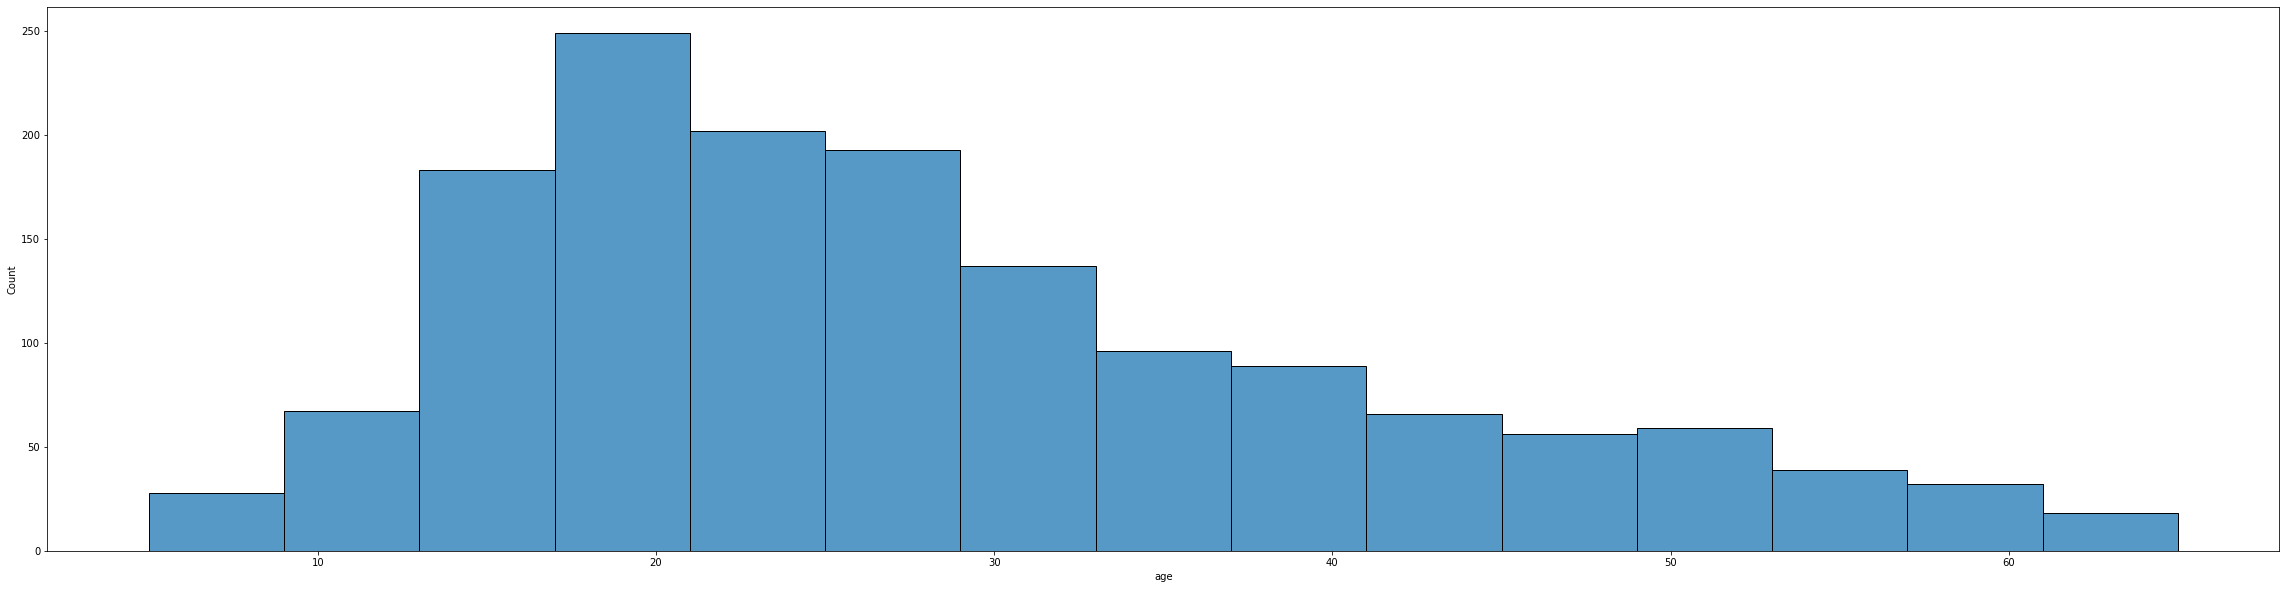

In [6]:
plt.figure(figsize=(40,10))

fig = sns.histplot( x="age", data=df_copia, bins=15)

#Sacamos el histograma para ver la distribución de los datos y así decidir que método estadístico usar. Usamos la mediana, ya que una media podría alterar mucho los resultados.

In [7]:
df["age"].median()

25.0

Como la mediana es un número entero, no necesitamos redondear a decimales.

In [8]:
df_copia["age"].fillna(df["age"].median(), inplace=True)

In [9]:
df_copia["age"].isnull().sum()

0

In [10]:
df_copia.sample(4)

,case_number,year,type,country,area,location,age,species_,date,mes,fatal_(y/n)_limpio,sex,country_
2311,2012.03.04,NaN,NaN,NaN,NaN,NaN,25.0,Unspecified,04-Mar-2012,Mar,N,F,NaN
2876,2007.05.10,NaN,NaN,NaN,NaN,NaN,25.0,Unspecified,10-May-2007,May,N,F,NaN
4082,1991.07.30,NaN,NaN,NaN,NaN,NaN,25.0,Unspecified,30-Jul-1991,Jul,N,F,NaN
4562,1980.03.28,NaN,NaN,NaN,NaN,NaN,25.0,Unspecified,28-Mar-1980,Mar,N,F,NaN


En relación a la columna de country al tratarse de una columna de tipo categórica, reemplazad los valores nulos por una nueva categória que se llame Unknown.


In [11]:
df_copia["country"].replace(np.nan,"Unknown", inplace=True)

In [12]:
df_copia["country"].isnull().sum()

0

In [13]:
df_copia.sample(4)

,case_number,year,type,country,area,location,age,species_,date,mes,fatal_(y/n)_limpio,sex,country_
6968,1906.01.28,NaN,NaN,Unknown,NaN,NaN,25.0,Unspecified,28-Jan-1906,Jan,Y,M,NaN
7217,1888.02.17,NaN,NaN,Unknown,NaN,NaN,25.0,Unspecified,17-Feb-1888,Feb,N,M,NaN
261,2012.06.26.a,2012.0,Unprovoked,usa,Hawaii,"Kahana Beach, Maui",16.0,Unspecified,NaN,NaN,NaN,F,usa
6058,1947.10.28,NaN,NaN,Unknown,NaN,NaN,25.0,Unspecified,28-Oct-1947,Oct,N,F,NaN


Reemplazad los valores nulos de la columna fatal por Unknown.


In [14]:
df_copia["fatal_(y/n)_limpio"].fillna("Unknown", inplace=True)

In [15]:
df_copia["fatal_(y/n)_limpio"].isnull().sum()

0

In [16]:
df_copia.sample(4)

,case_number,year,type,country,area,location,age,species_,date,mes,fatal_(y/n)_limpio,sex,country_
5582,1959.06.13,NaN,NaN,Unknown,NaN,NaN,25.0,Unspecified,13-Jun-1959,Jun,Unknown,M,NaN
4779,1973.12.19.R,NaN,NaN,Unknown,NaN,NaN,25.0,Unspecified,Reported 18-Dec-1973,Dec,Y,M,NaN
6272,1939.12.28,NaN,NaN,Unknown,NaN,NaN,25.0,Unspecified,28-Dec-1939,Dec,Unknown,M,NaN
5481,1960.05.19,NaN,NaN,Unknown,NaN,NaN,25.0,Unspecified,19-May-1960,May,N,M,NaN


Reemplazad los valores nulos de la columna type por el valor más frecuente (la moda).


In [17]:
# Como en base a las preguntas de la hipotesis hemos borrado la columna type, ya que hemos interpretado que la en esta pregunta: "¿Cuál es la relación entre la especie y el tipo de ataque (si es fatal o no)?"
# Se refería a si era fatal o no, vamos a aplicar este  ejercicio sobre la columna "injury", que también es de tipo categórico.

In [18]:
df_copia["type"].replace(np.nan, df_copia["type"].mode()[0], inplace=True)

In [19]:
df_copia["type"].isnull().sum()

0

In [20]:
df_copia.sample(2)

,case_number,year,type,country,area,location,age,species_,date,mes,fatal_(y/n)_limpio,sex,country_
1523,1755.00.00,1997.0,Unprovoked,sweden,Skagerrak arm of the North Sea,Bohuslän,25.0,Unspecified,NaN,NaN,Unknown,M,sweden
7694,ND.0110,NaN,Unprovoked,Unknown,NaN,NaN,25.0,Unspecified,"No date, late 1960s",NaN,Y,M,NaN


In [21]:
df_copia.sample(5)

,case_number,year,type,country,area,location,age,species_,date,mes,fatal_(y/n)_limpio,sex,country_
1993,2014.11.08,NaN,Unprovoked,Unknown,NaN,NaN,25.0,Unspecified,08-Nov-2014,Nov,N,F,NaN
5556,1959.08.30,NaN,Unprovoked,Unknown,NaN,NaN,25.0,Unspecified,30-Aug-1959,Aug,Unknown,F,NaN
1866,2016.06.23,NaN,Unprovoked,Unknown,NaN,NaN,25.0,Unspecified,23-Jun-2016,Jun,N,M,NaN
4662,1976.09.19,NaN,Unprovoked,Unknown,NaN,NaN,25.0,Unspecified,19-Sep-1976,Sep,N,F,NaN
2288,2012.05.31,NaN,Unprovoked,Unknown,NaN,NaN,25.0,Unspecified,31-May-2012,May,N,F,NaN


Reemplazad los valores nulos de la columna fecha por Unknown.


In [22]:
df_copia["date"].replace(np.nan, "Unknown", inplace=True)

In [23]:
df_copia["date"].isnull().sum()

0

Guardad el csv para seguir trabajando con el en los siguientes ejercicios de pair

In [24]:
df_copia.to_csv("datos/attacks_pandas_10b.csv")